<a href="https://colab.research.google.com/github/Leeeeunji/2021_1_java_teamProject/blob/main/lecture04_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

* One of the most popular library that data scientists use
* Labeled axes to avoid misalignment of data
    * Data[:, 2] represents weight or weight2?
    * When merge two tables, some rows may be different
* Missing values or special values may need to be removed or replaced

## Overview

* Created by Wes McKinney in 2008, now maintained by Jeff Reback and many others. 
    * Author of one of the textbooks: Python for Data Analysis
* Powerful and productive Python data analysis and Management Library
* Panel Data System
* Its an open source product. 


## Overview - 2

* Python Library to provide data analysis features similar to: R, MATLAB, SAS 
* Rich data structures and functions to make working with data structure fast, easy and expressive.
* It is built on top of NumPy
* Key components provided by Pandas:
    * Series 
    * DataFrame


In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## Series

* One dimensional array-like object
* It contains array of data (of any NumPy data type) with associated indexes. (Indexes can be strings or integers or other data types.)
* By default , the series will get indexing from 0 to N where N = size -1

In [ ]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [ ]:
obj.values

array([ 4,  7, -5,  3])

In [ ]:
obj.index

RangeIndex(start=0, stop=4, step=1)

### Series - referencing elements

In [ ]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [ ]:
obj2.values

array([ 4,  7, -5,  3])

In [ ]:
obj2['a']

-5

In [ ]:
obj2.a

-5

In [ ]:
obj2['d'] = 10
obj2[['d', 'c', 'a']]

d    10
c     3
a    -5
dtype: int64

In [ ]:
obj2[:2]

d    10
b     7
dtype: int64

### Series – array/dict operations

* numpy array operations can also be applied, which will preserve the index-value link


In [ ]:
obj2[obj2>0]

d    10
b     7
c     3
dtype: int64

In [ ]:
obj2**2

d    100
b     49
a     25
c      9
dtype: int64

* Can be thought of as a dict. 
* Can be constructed from a dict directly.

In [ ]:
'b' in obj2

True

In [ ]:
obj3 = Series({'a': 10, 'b': 5, 'c': 30})
obj3

a    10
b     5
c    30
dtype: int64

### Series - null values

In [ ]:
sdata = {'Texas': 10, 'Ohio': 20, 'Oregon': 15, 'Utah': 18}
states = ['Texas', 'Ohio', 'Oregon', 'Iowa']
obj4 = Series(sdata, index=states)
obj4

Texas     10.0
Ohio      20.0
Oregon    15.0
Iowa       NaN
dtype: float64

In [ ]:
pd.isnull(obj4)

Texas     False
Ohio      False
Oregon    False
Iowa       True
dtype: bool

In [ ]:
pd.notnull(obj4)

Texas      True
Ohio       True
Oregon     True
Iowa      False
dtype: bool

In [ ]:
obj4[obj4.notnull()]

Texas     10.0
Ohio      20.0
Oregon    15.0
dtype: float64

### Series - auto alignment

In [ ]:
obj4

Texas     10.0
Ohio      20.0
Oregon    15.0
Iowa       NaN
dtype: float64

In [ ]:
obj5 = Series({'Ohio': 20, 'Oregon': 15, 'Texas': 10, 'Utah': 15})
obj5

Ohio      20
Oregon    15
Texas     10
Utah      15
dtype: int64

In [ ]:
obj5 + obj4

Iowa       NaN
Ohio      40.0
Oregon    30.0
Texas     20.0
Utah       NaN
dtype: float64

### Series name and index name

In [ ]:
obj4.name = 'population'
obj4

Texas     10.0
Ohio      20.0
Oregon    15.0
Iowa       NaN
Name: population, dtype: float64

* Index of a series can be changed to a different index.
* Index object itself is immutable.

In [ ]:
obj4.index[2]='California'

TypeError: ignored

In [ ]:
obj4.index.name = 'state'
obj4

state
Texas     10.0
Ohio      20.0
Oregon    15.0
Iowa       NaN
Name: population, dtype: float64

In [ ]:
obj4.index = ['Florida', 'New York', 'Kentucky', 'Georgia']
obj4

Florida     10.0
New York    20.0
Kentucky    15.0
Georgia      NaN
Name: population, dtype: float64

## DataFrame

* A DataFrame is a tabular data structure comprised of rows and columns, akin to a spreadsheet or database table.
* It can be treated as an order collection of  columns
    * Each column can be a different data type
    * Have both row and column indices

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [ ]:
frame = DataFrame(data)

In [ ]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


### DataFrame – specifying columns and indices

* Order of columns/rows can be specified
* Columns not in data will have NaN

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [ ]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                   index=['A', 'B', 'C', 'D', 'E'])

In [ ]:
frame2

,year,state,pop,debt
A,2000,Ohio,1.5,NaN
B,2001,Ohio,1.7,NaN
C,2002,Ohio,3.6,NaN
D,2001,Nevada,2.4,NaN
E,2002,Nevada,2.9,NaN


### DataFrame – from nested dict of dicts

* Outer dict keys as columns and inner dict keys as row indices

In [ ]:
pop = {'Nevada': {2001: 2.9, 2002: 2.9},
       'Ohio': {2002: 3.6, 2001: 1.7, 2000: 1.5}}
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.9,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
frame3.T

,2001,2002,2000
Nevada,2.9,2.9,NaN
Ohio,1.7,3.6,1.5


### DataFrame – index, columns, values

In [ ]:
frame3.index # row label

Int64Index([2001, 2002, 2000], dtype='int64')

In [ ]:
frame3.columns # column label

Index(['Nevada', 'Ohio'], dtype='object')

In [ ]:
frame3.values

array([[2.9, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [ ]:
frame3.index.name = 'year'
frame3.columns.name='state'
frame3

state,Nevada,Ohio
year,,
2001,2.9,1.7
2002,2.9,3.6
2000,NaN,1.5


### Possible data inputs to DataFrame constructor


#### (1) 2D ndarray

A matrix of data, passing optional row and column labels

In [ ]:
pd.DataFrame(np.arange(12).reshape(3,4))

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


#### (2) dict of arrays, lists, or tuples

Each sequence becomes a column in the DataFrame. All sequences must be the same length

In [ ]:
pd.DataFrame({'a':[1,2,3],'b':[2,3,4],'c':[4,5,6]})

,a,b,c
0,1,2,4
1,2,3,5
2,3,4,6


In [ ]:
pd.DataFrame({'a':np.array([1,2,3]),'b':np.array([2,3,4]),'c':np.arange(3)})

,a,b,c
0,1,2,0
1,2,3,1
2,3,4,2


In [ ]:
pd.DataFrame(
    {
       ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
       ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
       ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
       ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
       ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
   }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#### (3) NumPy structured/record array

Treated as the "dict of arrays" case

In [ ]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


#### (4) dict of Series

Each value becomes a column. Indexes from each Series are unioned together to form the result's row index if no explicit index is passed.

In [ ]:
a=pd.Series([1,2,3])
b=pd.Series([2,3,4])
c=pd.Series([0,1,2])
pd.DataFrame({'a':a,'b':b,'c':c})

,a,b,c
0,1,2,0
1,2,3,1
2,3,4,2


#### (5) dict of dicts

Each inner dict becomes a column. Keys are unioned to form the row index as in the "dict of Series" case.

In [ ]:
pd.DataFrame({'a':{0:1,1:2,2:3},'b':{0:2,1:3,2:3},'c':{0:0,1:1,2:2}})

,a,b,c
0,1,2,0
1,2,3,1
2,3,3,2


#### (6) list of dicts or Series

Each item becomes a row in the DataFrame. Union of dict keys or Series indexes become the DataFrame's column labels

In [ ]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


#### (7) List of lists or tuples

Treated as the "2D ndarray" case

In [ ]:
a = pd.DataFrame([[1,2,3],[2,3,4],[0,1,2]],index=['aa','bb','cc'],columns=['a','b','c'])
a

,a,b,c
aa,1,2,3
bb,2,3,4
cc,0,1,2


#### (8) Another DataFrame

The DataFrame's indexes are used unless different ones are passed

In [ ]:
pd.DataFrame(a.values,index=['naa','nbb','ncc'],columns=['na','nb','nc']) #Note that,using a.values

,na,nb,nc
naa,1,2,3
nbb,2,3,4
ncc,0,1,2


#### (9) NumPy MaskedArray

Like the "2D ndarray" case except masked values become NA/missing in the DataFrame result

In [ ]:
a = np.ma.array([(1, 2.2), (42, 5.5)],
                mask = [(True, False), (False, True)])
a

masked_array(
  data=[[--, 2.2],
        [42.0, --]],
  mask=[[ True, False],
        [False,  True]],
  fill_value=1e+20)

In [ ]:
pd.DataFrame(a)

,0,1
0,NaN,2.2
1,42.0,NaN


### Indexing, selection and filtering

* Series and DataFrame can be sliced/accessed with label-based indexes, or using position-based indexes similar to Numpy Array

In [ ]:
S = Series(range(4), index=['zero', 'one', 'two', 'three'])

In [ ]:
S['two']

2

In [ ]:
S[['zero', 'two']]

zero    0
two     2
dtype: int64

In [ ]:
S[2]

2

In [ ]:
S[[0,2]]

zero    0
two     2
dtype: int64

In [ ]:
S[:2]

zero    0
one     1
dtype: int64

In [ ]:
S['zero':'two']

zero    0
one     1
two     2
dtype: int64

In [ ]:
S[S > 1]

two      2
three    3
dtype: int64

In [ ]:
S[-2:]

two      2
three    3
dtype: int64

### DataFrame – retrieving a column

* A column in a DataFrame can be retrieved as a Series by dict-like notation or as attribute
* Series index and name have been kept/set appropriately

In [ ]:
frame['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [ ]:
frame.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [ ]:
type(frame['state'])

pandas.core.series.Series

### DataFrame – getting rows

* loc for using indexes and iloc for using positions

In [ ]:
frame2

,year,state,pop,debt
A,2000,Ohio,1.5,NaN
B,2001,Ohio,1.7,NaN
C,2002,Ohio,3.6,NaN
D,2001,Nevada,2.4,NaN
E,2002,Nevada,2.9,NaN


In [ ]:
frame2.loc['A']

year     2000
state    Ohio
pop       1.5
debt      NaN
Name: A, dtype: object

In [ ]:
type(frame2.loc['A'])

pandas.core.series.Series

In [ ]:
frame2.loc[['A', 'B']]

,year,state,pop,debt
A,2000,Ohio,1.5,NaN
B,2001,Ohio,1.7,NaN


In [ ]:
type(frame2.loc[['A', 'B']])

pandas.core.frame.DataFrame

### DataFrame – modifying columns

In [ ]:
frame2['debt'] = 0
frame2

,year,state,pop,debt
A,2000,Ohio,1.5,0
B,2001,Ohio,1.7,0
C,2002,Ohio,3.6,0
D,2001,Nevada,2.4,0
E,2002,Nevada,2.9,0


In [ ]:
frame2['debt'] = range(5)
frame2

,year,state,pop,debt
A,2000,Ohio,1.5,0
B,2001,Ohio,1.7,1
C,2002,Ohio,3.6,2
D,2001,Nevada,2.4,3
E,2002,Nevada,2.9,4


In [ ]:
val = Series([10, 10, 10],
    index=['A', 'C', 'D'])
frame2['debt'] = val
frame2

,year,state,pop,debt
A,2000,Ohio,1.5,10.0
B,2001,Ohio,1.7,NaN
C,2002,Ohio,3.6,10.0
D,2001,Nevada,2.4,10.0
E,2002,Nevada,2.9,NaN


Rows or individual elements can be modified similarly. Using loc or iloc.

### DataFrame – removing columns

In [ ]:
del frame2['debt']
frame2

,year,state,pop
A,2000,Ohio,1.5
B,2001,Ohio,1.7
C,2002,Ohio,3.6
D,2001,Nevada,2.4
E,2002,Nevada,2.9


### More on DataFrame indexing

In [ ]:
data = np.arange(9).reshape(3,-1)
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
frame = DataFrame(data, 
    index=['r1', 'r2', 'r3'], 
    columns=['c1', 'c2', 'c3'])
frame

,c1,c2,c3
r1,0,1,2
r2,3,4,5
r3,6,7,8


In [ ]:
frame['c1']

r1    0
r2    3
r3    6
Name: c1, dtype: int64

In [ ]:
frame.loc['r1']

c1    0
c2    1
c3    2
Name: r1, dtype: int64

In [ ]:
frame['c1']['r1']

0

In [ ]:
frame['r1']['c1']

KeyError: ignored

In [ ]:
frame[['c1', 'c3']]

,c1,c3
r1,0,2
r2,3,5
r3,6,8


In [ ]:
frame.loc[['r1', 'r3']]

,c1,c2,c3
r1,0,1,2
r3,6,7,8


In [ ]:
frame.iloc[:2] # row slices

,c1,c2,c3
r1,0,1,2
r2,3,4,5


In [ ]:
frame[:2] # row slices

,c1,c2,c3
r1,0,1,2
r2,3,4,5


In [ ]:
frame.loc[['r1', 'r2'], ['c1', 'c2']]

,c1,c2
r1,0,1
r2,3,4


In [ ]:
frame.loc['r1':'r3', 'c1':'c3']

,c1,c2,c3
r1,0,1,2
r2,3,4,5
r3,6,7,8


In [ ]:
frame.iloc[:2,:2]

,c1,c2
r1,0,1
r2,3,4


In [ ]:
v = DataFrame(np.arange(9).reshape(3,3),
        index=['a', 'a', 'b'], 
        columns=['c1','c2','c3'])
v

,c1,c2,c3
a,0,1,2
a,3,4,5
b,6,7,8


In [ ]:
v.loc['a']

,c1,c2,c3
a,0,1,2
a,3,4,5


In [ ]:
frame

,c1,c2,c3
r1,0,1,2
r2,3,4,5
r3,6,7,8


In [ ]:
frame[frame['c1'] > 0]

,c1,c2,c3
r2,3,4,5
r3,6,7,8


In [ ]:
frame['c1'] > 0

r1    False
r2     True
r3     True
Name: c1, dtype: bool

In [ ]:
frame < 3

,c1,c2,c3
r1,True,True,True
r2,False,False,False
r3,False,False,False


In [ ]:
frame[frame < 3] = 3
frame

,c1,c2,c3
r1,3,3,3
r2,3,4,5
r3,6,7,8


### DataFrame - Removing rows/columns

In [ ]:
frame.drop(['r1'])

,c1,c2,c3
r2,3,4,5
r3,6,7,8


In [ ]:
frame.drop(['r1','r3'])

,c1,c2,c3
r2,3,4,5


In [ ]:
frame.drop(['c1'], axis=1)

,c2,c3
r1,3,3
r2,4,5
r3,7,8


In [ ]:
frame

,c1,c2,c3
r1,3,3,3
r2,3,4,5
r3,6,7,8


### Reindexing

In [ ]:
frame.reindex(['r1', 'r3', 'r2', 'r4'])

,c1,c2,c3
r1,3.0,3.0,3.0
r3,6.0,7.0,8.0
r2,3.0,4.0,5.0
r4,NaN,NaN,NaN


In [ ]:
frame.reindex(columns = ['c2', 'c3', 'c1'])

,c2,c3,c1
r1,3,3,3
r2,4,5,3
r3,7,8,6


### Function application and mapping

* `DataFrame.applymap(f)` applies f to every entry
* `DataFrame.apply(f)` applies f to every column (default) or row

In [ ]:
def square(x): return x**2
frame.applymap(square)

,c1,c2,c3
r1,9,9,9
r2,9,16,25
r3,36,49,64


In [ ]:
def max_minus_min(x): return max(x)-min(x)
frame.apply(max_minus_min)

c1    3
c2    4
c3    5
dtype: int64

In [ ]:
frame.apply(max_minus_min,
            axis=1)

r1    0
r2    2
r3    2
dtype: int64

In [ ]:
def max_min(x):
    return Series([max(x), min(x)], index=['max', 'min'])

frame.apply(max_min)

,c1,c2,c3
max,6,7,8
min,3,3,3


### Other DataFrame functions

* `sort_index()`
* `sort_values()`
* `rank()`

In [ ]:
frame = DataFrame(np.arange(9).reshape(3,-1), 
    index=['A','C','B'], 
    columns=['b','a','c'])
frame

,b,a,c
A,0,1,2
C,3,4,5
B,6,7,8


In [ ]:
frame.sort_index()

,b,a,c
A,0,1,2
B,6,7,8
C,3,4,5


In [ ]:
frame.sort_index(axis=1)

,a,b,c
A,1,0,2
C,4,3,5
B,7,6,8


In [ ]:
frame = DataFrame(np.random.randint(0, 10, 9).reshape(3,-1),
        index=['r1', 'r2', 'r3'], columns=['c1', 'c2', 'c3'])
frame

,c1,c2,c3
r1,5,2,7
r2,6,0,3
r3,2,8,9


In [ ]:
frame.sort_values(by='c1')

,c1,c2,c3
r3,2,8,9
r1,5,2,7
r2,6,0,3


In [ ]:
frame.sort_values(axis=1, 
                  by=['r2','r1'])

,c2,c3,c1
r1,2,7,5
r2,0,3,6
r3,8,9,2


In [ ]:
frame = DataFrame(np.array([[8, 3, 9],[2, 5, 0],[4, 4, 8]]),
                  index=['r1', 'r2', 'r3'], columns=['c1', 'c2', 'c3'])
frame

,c1,c2,c3
r1,8,3,9
r2,2,5,0
r3,4,4,8


In [ ]:
frame.rank(axis=1)

,c1,c2,c3
r1,2.0,1.0,3.0
r2,2.0,3.0,1.0
r3,1.5,1.5,3.0


In [ ]:
frame.mean()

c1    4.666667
c2    4.000000
c3    5.666667
dtype: float64

In [ ]:
frame.mean(axis=1)

r1    6.666667
r2    2.333333
r3    5.333333
dtype: float64

In [ ]:
frame.sum()

c1    14
c2    12
c3    17
dtype: int64

In [ ]:
frame.cumsum()

,c1,c2,c3
r1,8,3,9
r2,10,8,9
r3,14,12,17


In [ ]:
frame.describe()

,c1,c2,c3
count,3.000000,3.0,3.000000
mean,4.666667,4.0,5.666667
std,3.055050,1.0,4.932883
min,2.000000,3.0,0.000000
25%,3.000000,3.5,4.000000
50%,4.000000,4.0,8.000000
75%,6.000000,4.5,8.500000
max,8.000000,5.0,9.000000


### Handling missing data

In [ ]:
from numpy import nan as NaN
data = Series([1, NaN, 2.5, NaN, 6])

In [ ]:
data.notnull()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
data[data.notnull()]

0    1.0
2    2.5
4    6.0
dtype: float64

In [ ]:
data.dropna()

0    1.0
2    2.5
4    6.0
dtype: float64

In [ ]:
data

0    1.0
1    NaN
2    2.5
3    NaN
4    6.0
dtype: float64

In [ ]:
data = DataFrame([[1, 2, 3], [1, NaN, NaN], [NaN, NaN, NaN], [NaN, 4, 5]])
data

,0,1,2
0,1.0,2.0,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,4.0,5.0


In [ ]:
data.dropna()

,0,1,2
0,1.0,2.0,3.0


In [ ]:
data.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,1.0,NaN,NaN
3,NaN,4.0,5.0


In [ ]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,2.0,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,4.0,5.0


In [ ]:
data[4]=NaN
data

,0,1,2,4
0,1.0,2.0,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,4.0,5.0,NaN


In [ ]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,2.0,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,4.0,5.0


### Filling in missing data

In [ ]:
data

,0,1,2,4
0,1.0,2.0,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,4.0,5.0,NaN


In [ ]:
data.fillna(0)

,0,1,2,4
0,1.0,2.0,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,4.0,5.0,0.0


In [ ]:
data

,0,1,2,4
0,1.0,2.0,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,4.0,5.0,NaN


In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data

,0,1,2,4
0,1.0,2.0,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,4.0,5.0,0.0


In [ ]:
data = DataFrame([[1, 2, 3], [1, NaN, NaN], [NaN, NaN, NaN], [NaN, 4, 5]])
data

,0,1,2
0,1.0,2.0,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,4.0,5.0


In [ ]:
data.fillna(data.mean(skipna=True))

,0,1,2
0,1.0,2.0,3.0
1,1.0,3.0,4.0
2,1.0,3.0,4.0
3,1.0,4.0,5.0


### Hierarchical indexing

#### MultiIndex

In [ ]:
dataSeries = Series(np.arange(10), 
    index=[['a']*3+['b']*3+['c']*4, ['i','ii','iii']*3+['iv']])
dataSeries

a  i      0
   ii     1
   iii    2
b  i      3
   ii     4
   iii    5
c  i      6
   ii     7
   iii    8
   iv     9
dtype: int64

In [ ]:
dataSeries.index

MultiIndex([('a',   'i'),
            ('a',  'ii'),
            ('a', 'iii'),
            ('b',   'i'),
            ('b',  'ii'),
            ('b', 'iii'),
            ('c',   'i'),
            ('c',  'ii'),
            ('c', 'iii'),
            ('c',  'iv')],
           )

In [ ]:
dataSeries['b']

i      3
ii     4
iii    5
dtype: int64

In [ ]:
dataSeries[:, 'ii']

a    1
b    4
c    7
dtype: int64

#### Unstack and stack

In [ ]:
dataSeries.unstack()

,i,ii,iii,iv
a,0.0,1.0,2.0,NaN
b,3.0,4.0,5.0,NaN
c,6.0,7.0,8.0,9.0


In [ ]:
dataSeries.unstack().T.stack()

i    a    0.0
     b    3.0
     c    6.0
ii   a    1.0
     b    4.0
     c    7.0
iii  a    2.0
     b    5.0
     c    8.0
iv   c    9.0
dtype: float64

#### swaplevel

In [ ]:
frame2 = DataFrame(np.arange(16).reshape(4,4), 
    index=[['a', 'a', 'b', 'b'], ['i','ii']*2], 
    columns=[['c1', 'c1', 'c2', 'c2'], ['.1', '.2']*2])
frame2

c1      c2    
      .1  .2  .1  .2
a i    0   1   2   3
  ii   4   5   6   7
b i    8   9  10  11
  ii  12  13  14  15

In [ ]:
frame2.swaplevel(-2, -1)

c1      c2    
      .1  .2  .1  .2
i  a   0   1   2   3
ii a   4   5   6   7
i  b   8   9  10  11
ii b  12  13  14  15

In [ ]:
frame2.swaplevel(-2, -1, axis=1)

.1  .2  .1  .2
      c1  c1  c2  c2
a i    0   1   2   3
  ii   4   5   6   7
b i    8   9  10  11
  ii  12  13  14  15

### Use DataFrame columns as indices

In [ ]:
df = DataFrame({'a':range(7), 
                'b':range(7,0,-1), 
                'c':['one']*3+['two']*4, 
                'd':[0,1,2]*2+[3]})
df

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [ ]:
df2 = df.set_index(['c', 'a'])
df2

b  d
c   a      
one 0  7  0
    1  6  1
    2  5  2
two 3  4  0
    4  3  1
    5  2  2
    6  1  3

In [ ]:
df2.loc['one']

,b,d
a,,
0,7,0
1,6,1
2,5,2


## Data transformation and normalization

* Use boxplot to take a quick book
* Transform data to obtain a certain distribution
    * e.g. from lognormal to normal
    * Normalize data so different columns became comparable / compatible
* Typical normalization approach:
    * Z-score transformation
    * Scale to between 0 and 1
    * Trimmed mean normalization
    * Vector length transformation
    * Quantilenorm


In [ ]:
df=DataFrame({'a': np.random.rand(1000),
              'b': np.random.randn(1000, ), 
              'c': np.random.lognormal(size=(1000,))})
df.head()

,a,b,c
0,0.381531,0.731739,0.341240
1,0.429394,1.770956,1.141495
2,0.523516,1.463497,2.268549
3,0.466471,-0.069437,3.011854
4,0.095517,-0.480045,0.331897


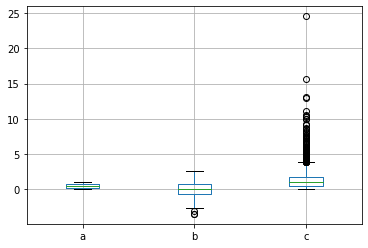

In [ ]:
df.boxplot()

In [ ]:
! git clone https://github.com/soonkijung/ds-datasets

Cloning into 'ds-datasets'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [ ]:
df2 = pd.read_csv('/content/ds-datasets/brfss.csv', index_col=0)

In [ ]:
df2.head()

,age,weight2,wtyrago,wtkg2,htm3,sex
0,39.0,88.636364,88.636364,88.64,180.0,1
1,64.0,75.000000,84.545455,75.00,155.0,2
2,87.0,61.818182,63.636364,61.82,NaN,2
3,51.0,100.000000,100.000000,100.00,183.0,1
4,35.0,63.636364,61.363636,63.64,170.0,2


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


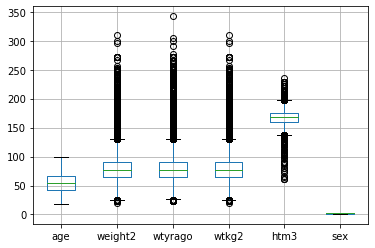

In [ ]:
df2.boxplot()

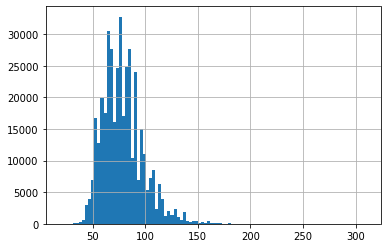

In [ ]:
df2['weight2'].hist(bins=100)

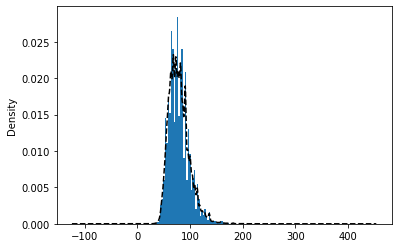

In [ ]:
df2['weight2'].hist(bins=100, density=True)
df2['weight2'].plot(kind='kde', style='k--')

In [ ]:
df3 = DataFrame(np.random.randint(0, 10, (4, 3)),
        index=['A', 'B', 'C', 'D'],
        columns=['i', 'ii', 'iii'])
df3

,i,ii,iii
A,6,6,9
B,0,6,6
C,5,3,7
D,2,3,1


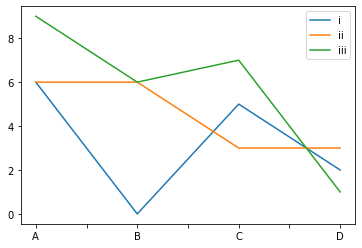

In [ ]:
df3.plot()

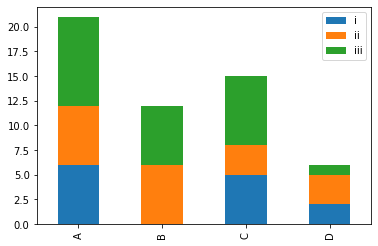

In [ ]:
df3.plot(kind='bar', stacked=True)

### Why normalization (re-scaling)

In [ ]:
df6 = DataFrame(np.array([[63, 5.25, 160, 150], [64, 5.33, 162.6, 155], [72, 6, 182.9, 156]]), 
    index=[['A', 'B', 'C']], 
    columns=[['inch', 'foot', 'cm', 'lb']])
df6

,inch,foot,cm,lb
A,63.0,5.25,160.0,150.0
B,64.0,5.33,162.6,155.0
C,72.0,6.00,182.9,156.0


In [ ]:
def distance(df1, df2, cols):
    return ((df1[cols].values - df2[cols].values)**2).sum()**0.5

In [ ]:
distance(df6.loc['A'], df6.loc['B'], ['foot', 'lb'])

5.000639959045242

In [ ]:
for a in range(3):
    for b in range(a+1,3):
        for h in ['foot', 'inch']:
            print(df6.index[a][0], df6.index[b][0], [h, 'lb'],
                  distance(df6.iloc[a], df6.iloc[b], [h, 'lb']))

A B ['foot', 'lb'] 5.000639959045242
A B ['inch', 'lb'] 5.0990195135927845
A C ['foot', 'lb'] 6.046693311223912
A C ['inch', 'lb'] 10.816653826391969
B C ['foot', 'lb'] 1.2037026210821342
B C ['inch', 'lb'] 8.06225774829855


### Z-score transformation

In [ ]:
df4 = df2.drop('sex', axis=1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


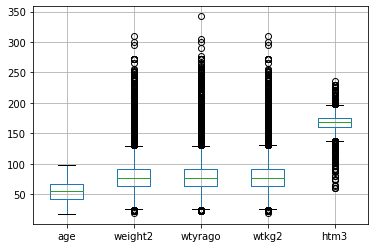

In [ ]:
df4.boxplot()

In [ ]:
def zscore(series): 
    return ((series - series.mean(skipna=True))
    / series.std(skipna=True))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


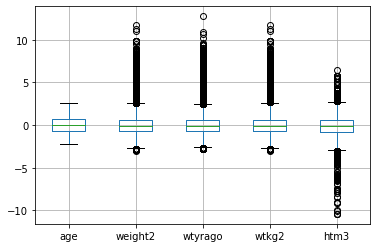

In [ ]:
df5 = df4.apply(zscore)
df5.boxplot()

### Scaling to between 0 and 1

In [ ]:
def scaling(series):
    return ((series - series.min())
    / (series.max() - series.min()))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


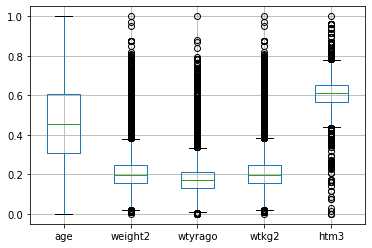

In [ ]:
df7 = df4.apply(scaling)
df7.boxplot()

### Mean-based scaling

In [ ]:
def meanScaling(series):
    return series / series.mean()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


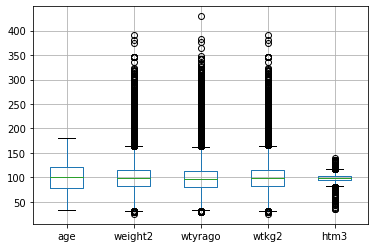

In [ ]:
df8 = df4.apply(meanScaling) * 100
df8.boxplot()

In [ ]:
from scipy import stats
def trimMeanScale(series, proportionToCut=0):
    return series / stats.trim_mean(series.dropna(), 
                                    proportionToCut)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


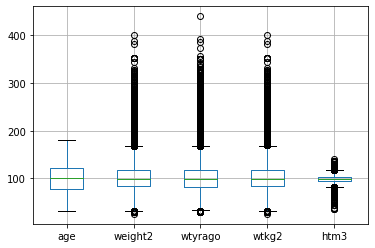

In [ ]:
df8 = df4.apply(trimMeanScale, proportionToCut=0.1)*100
df8.boxplot()

### Transform and normalize

In [ ]:
df9 = df4.transform({'age': np.copy, 'weight2': np.log, 
    'wtyrago': np.log, 'wtkg2': np.log, 'htm3': np.copy})

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


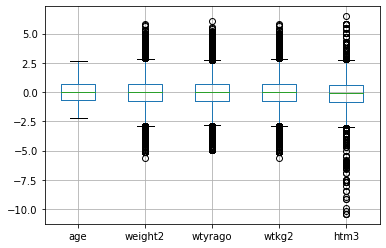

In [ ]:
df10 = df9.apply(zscore)
df10.boxplot()